## A CLASSIFICATION PROJECT - THE SEPSIS CASE STUDY

#### BUSINESS UNDERSTANDING
Sepsis is a critical health condition with significant implications for patient outcomes and healthcare systems. Predicting and managing sepsis effectively can reduce mortality rates, improve patient recovery, and decrease healthcare costs. This project aims to leverage machine learning models and FastAPI to predict sepsis, thereby enabling timely interventions and enhancing clinical decision-making. This project aims to enhance the early detection and management of sepsis through a machine learning-based predictive model deployed as an API with FastAPI. By addressing a critical healthcare challenge, the project seeks to improve patient outcomes, optimize resource utilization, and provide valuable decision support for healthcare providers. The success of the project will be measured by its impact on clinical practice and its ability to deliver timely, accurate predictions in a real-world healthcare setting.

#### Business Objectives
1. Early Detection: Develop a predictive model to identify patients at risk of sepsis early, allowing for prompt intervention and treatment.

2. Reduce Mortality Rates: Use the predictive model to minimize the time to diagnosis and treatment, thereby reducing sepsis-related deaths.

3. Optimize Resource Utilization: Allocate medical resources more efficiently by identifying high-risk patients, reducing unnecessary testing and treatments for low-risk individuals.

4. Enhance Clinical Decision-Making: Provide healthcare professionals with reliable tools to support clinical decisions, improving patient care quality.

##### HYPOTHESIS
NULL HYPOTHESIS: There is no significant relationship between sepsis and PRG (Plasma/glucose).

ALTERNATE HYPOTHESIS: There is a significant relationship between sepsis and PRG (Plasma /glucose).

#### ANALYTICAL QUESTIONS
1. How is the distribution of plasma glucose (PRG) among patients who develop sepsis versus those who don't?

2. What is the correlation between blood pressure (PR) and the likelihood of sepsis development?

3. Are there any noticeable differences in body mass index (M11) between patients with and without sepsis?

4. How does age vary between patients who develop sepsis and those who don't?

5. Is there a pattern in the blood work results (PL, SK, TS, BD2) that distinguishes patients with sepsis from those without?

#### DATA UNDERSTANDING

#### Load the necessary packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats
import scipy.stats as stats
#Machine Learning Packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import FunctionTransformer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from imblearn.pipeline import Pipeline as imbpipeline
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import joblib
import warnings
warnings.filterwarnings('ignore')

#### Load the datasets

In [2]:
#Load training dataset
df = pd.read_csv("Datasets/Paitients_Files_Train.csv")
df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


#### Data Description: A summary of the dataset attributes:
* ID: number to represent patient ID

* PRG: Plasma glucose

* PL: Blood Work Result-1 (mu U/ml)

* PR: Blood Pressure (mm Hg)

* SK: Blood Work Result-2 (mm)

* TS: Blood Work Result-3 (mu U/ml)

* M11: Body mass index (weight in kg/(height in m)^2

* BD2: Blood Work Result-4 (mu U/ml)

* Age: patients age (years)

* Insurance: If a patient holds a valid insurance card

* Sepsis: Positive: if a patient in ICU will develop a sepsis , and Negative: otherwise

In [3]:
#Load the test data
test_df = pd.read_csv("Datasets/Paitients_Files_Test.csv")
test_df

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0
...,...,...,...,...,...,...,...,...,...,...
164,ICU200773,10,101,76,48,180,32.9,0.171,63,1
165,ICU200774,2,122,70,27,0,36.8,0.340,27,1
166,ICU200775,5,121,72,23,112,26.2,0.245,30,1
167,ICU200776,1,126,60,0,0,30.1,0.349,47,1


In [4]:
#Check cell values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [5]:
#Check for duplicates
df.duplicated().sum()

np.int64(0)

* This shows there are no duplicates in the dataset

In [6]:
#Check missing values
df.isna().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

* This shows there are no missing values in the dataset

In [7]:
#Check statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [8]:
#Check Unique Values
def check_unique_values(df):
    for column in df.columns:
        unique_values = df[column].unique()
        print(f"Unique values in column '{column}': {unique_values}")

check_unique_values(df)

Unique values in column 'ID': ['ICU200010' 'ICU200011' 'ICU200012' 'ICU200013' 'ICU200014' 'ICU200015'
 'ICU200016' 'ICU200017' 'ICU200018' 'ICU200019' 'ICU200020' 'ICU200021'
 'ICU200022' 'ICU200023' 'ICU200024' 'ICU200025' 'ICU200026' 'ICU200027'
 'ICU200028' 'ICU200029' 'ICU200030' 'ICU200031' 'ICU200032' 'ICU200033'
 'ICU200034' 'ICU200035' 'ICU200036' 'ICU200037' 'ICU200038' 'ICU200039'
 'ICU200040' 'ICU200041' 'ICU200042' 'ICU200043' 'ICU200044' 'ICU200045'
 'ICU200046' 'ICU200047' 'ICU200048' 'ICU200049' 'ICU200050' 'ICU200051'
 'ICU200052' 'ICU200053' 'ICU200054' 'ICU200055' 'ICU200056' 'ICU200057'
 'ICU200058' 'ICU200059' 'ICU200060' 'ICU200061' 'ICU200062' 'ICU200063'
 'ICU200064' 'ICU200065' 'ICU200066' 'ICU200067' 'ICU200068' 'ICU200069'
 'ICU200070' 'ICU200071' 'ICU200072' 'ICU200073' 'ICU200074' 'ICU200075'
 'ICU200076' 'ICU200077' 'ICU200078' 'ICU200079' 'ICU200080' 'ICU200081'
 'ICU200082' 'ICU200083' 'ICU200084' 'ICU200085' 'ICU200086' 'ICU200087'
 'ICU200088' 'ICU2000

#### Rename the Columns

In [9]:
df = df.rename(columns={'PRG': 'Plasma_Glucose', 'PL': 'Blood_Work_Result_1',
                        'PR': 'Blood_Pressure','SK': 'Blood_Work_Result_2',
                        'TS': 'Blood_Work_Result_3', 'M11': 'Body_Mass_Index',
                        'BD2': 'Blood_Work_Result_4', 'Sepssis': 'Sepsis'})

In [10]:
#Convert column names to lower case
df.columns = df.columns.str.lower()

#Check the columns to confirm
column_names = df.columns
print(column_names)

Index(['id', 'plasma_glucose', 'blood_work_result_1', 'blood_pressure',
       'blood_work_result_2', 'blood_work_result_3', 'body_mass_index',
       'blood_work_result_4', 'age', 'insurance', 'sepsis'],
      dtype='object')


In [11]:
#Preview the dataset
df.head()

,id,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,age,insurance,sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


#### UNIVARIATE ANALYSIS

##### The Distribution of the Categorical Variables

sepsis
Negative    391
Positive    208
Name: count, dtype: int64
insurance
1    411
0    188
Name: count, dtype: int64


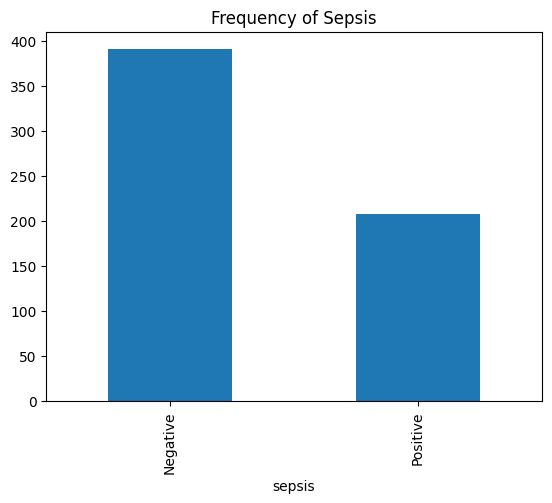

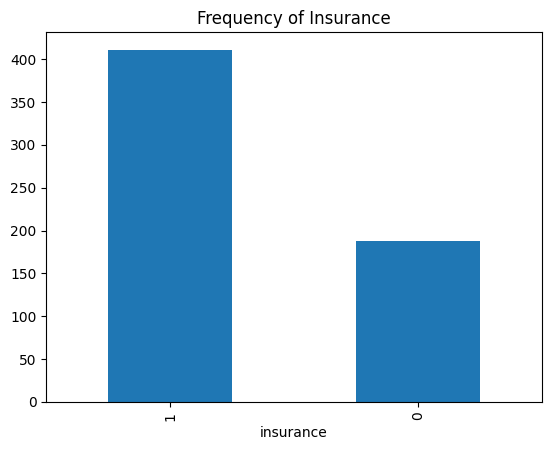

In [12]:
#Frequency tables
print(df['sepsis'].value_counts())
print(df['insurance'].value_counts())

#Bar charts
df['sepsis'].value_counts().plot(kind='bar')
plt.title('Frequency of Sepsis')
plt.show()

df['insurance'].value_counts().plot(kind='bar')
plt.title('Frequency of Insurance')
plt.show()

##### Distribution of Numerical Variables

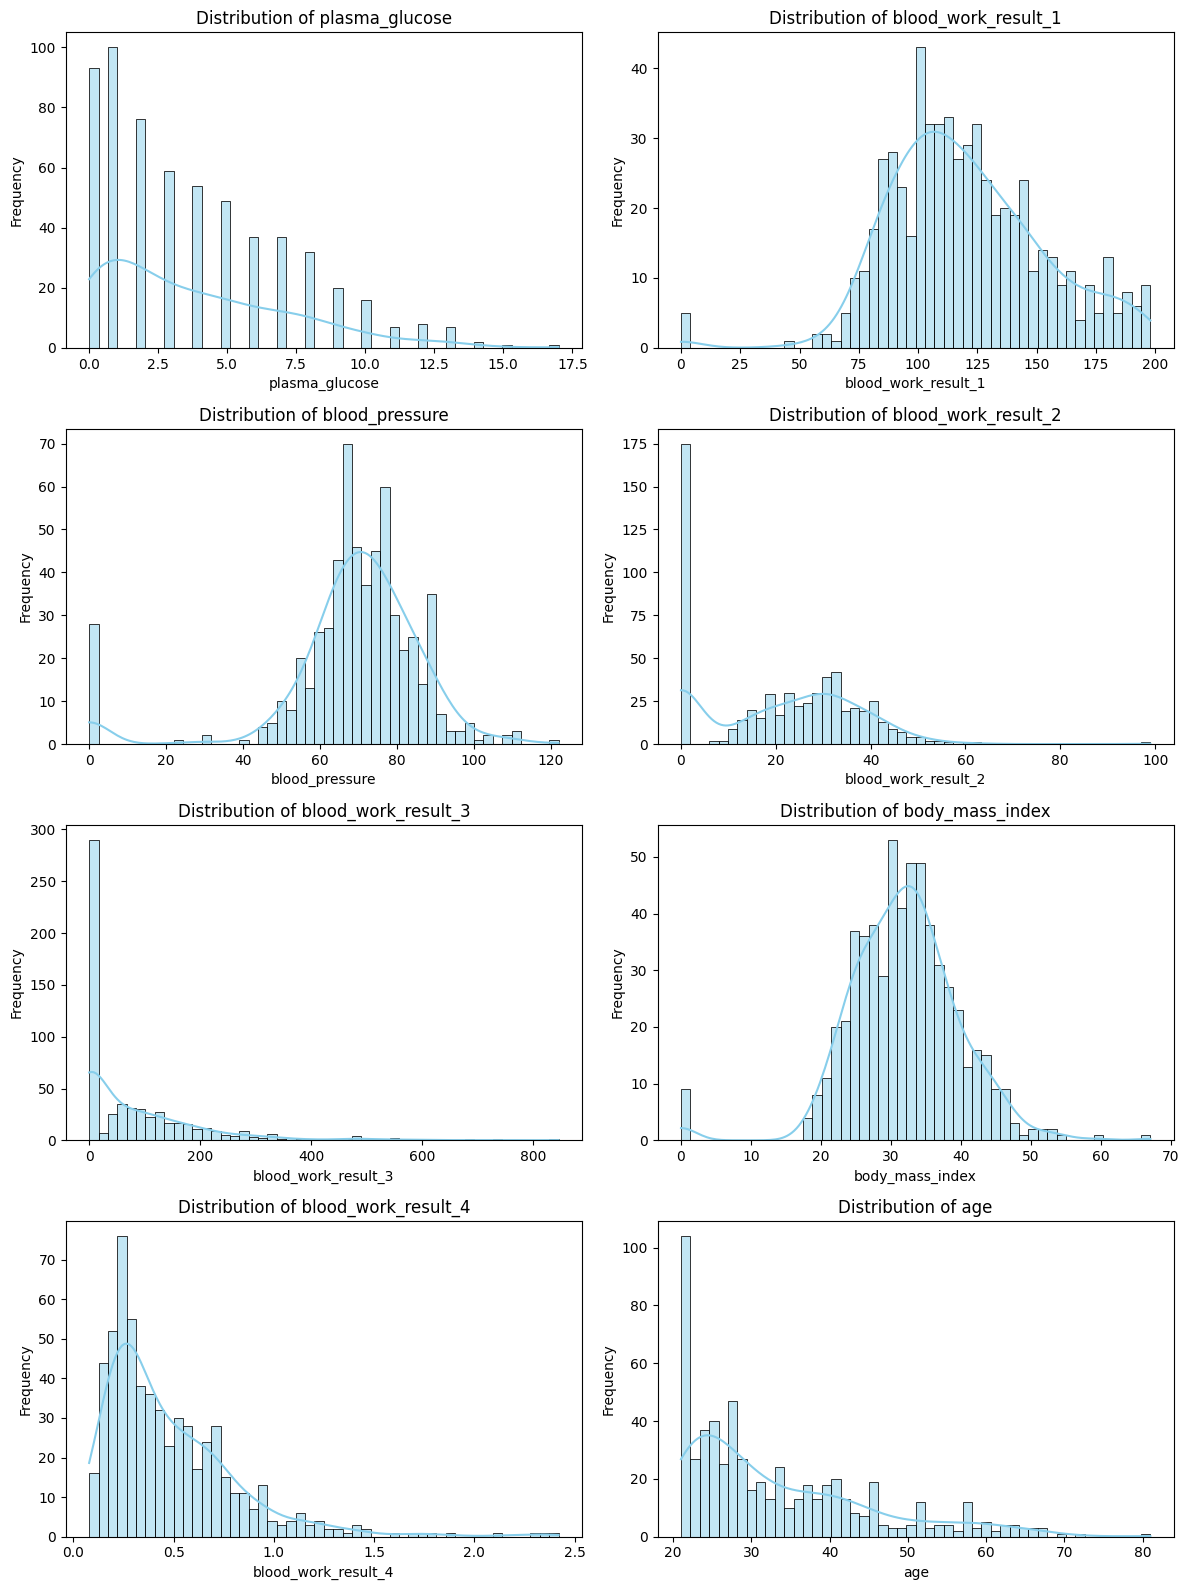

In [15]:
#Create histograms with KDE plots to visualize distribution of other columns
cols = ['plasma_glucose', 'blood_work_result_1', 'blood_pressure', 'blood_work_result_2', 'blood_work_result_3', 'body_mass_index', 'blood_work_result_4', 'age']

#Calculate the number of rows needed
num_rows = len(cols) // 2 + len(cols) % 2

#Set up subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

#Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

#Iterate over columns and create histograms with KDE plots
for i, column in enumerate(cols):
    sns.histplot(df[column], kde=True, bins=50, color='skyblue', ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

#Remove empty subplots if the number of subplots is odd
if len(cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

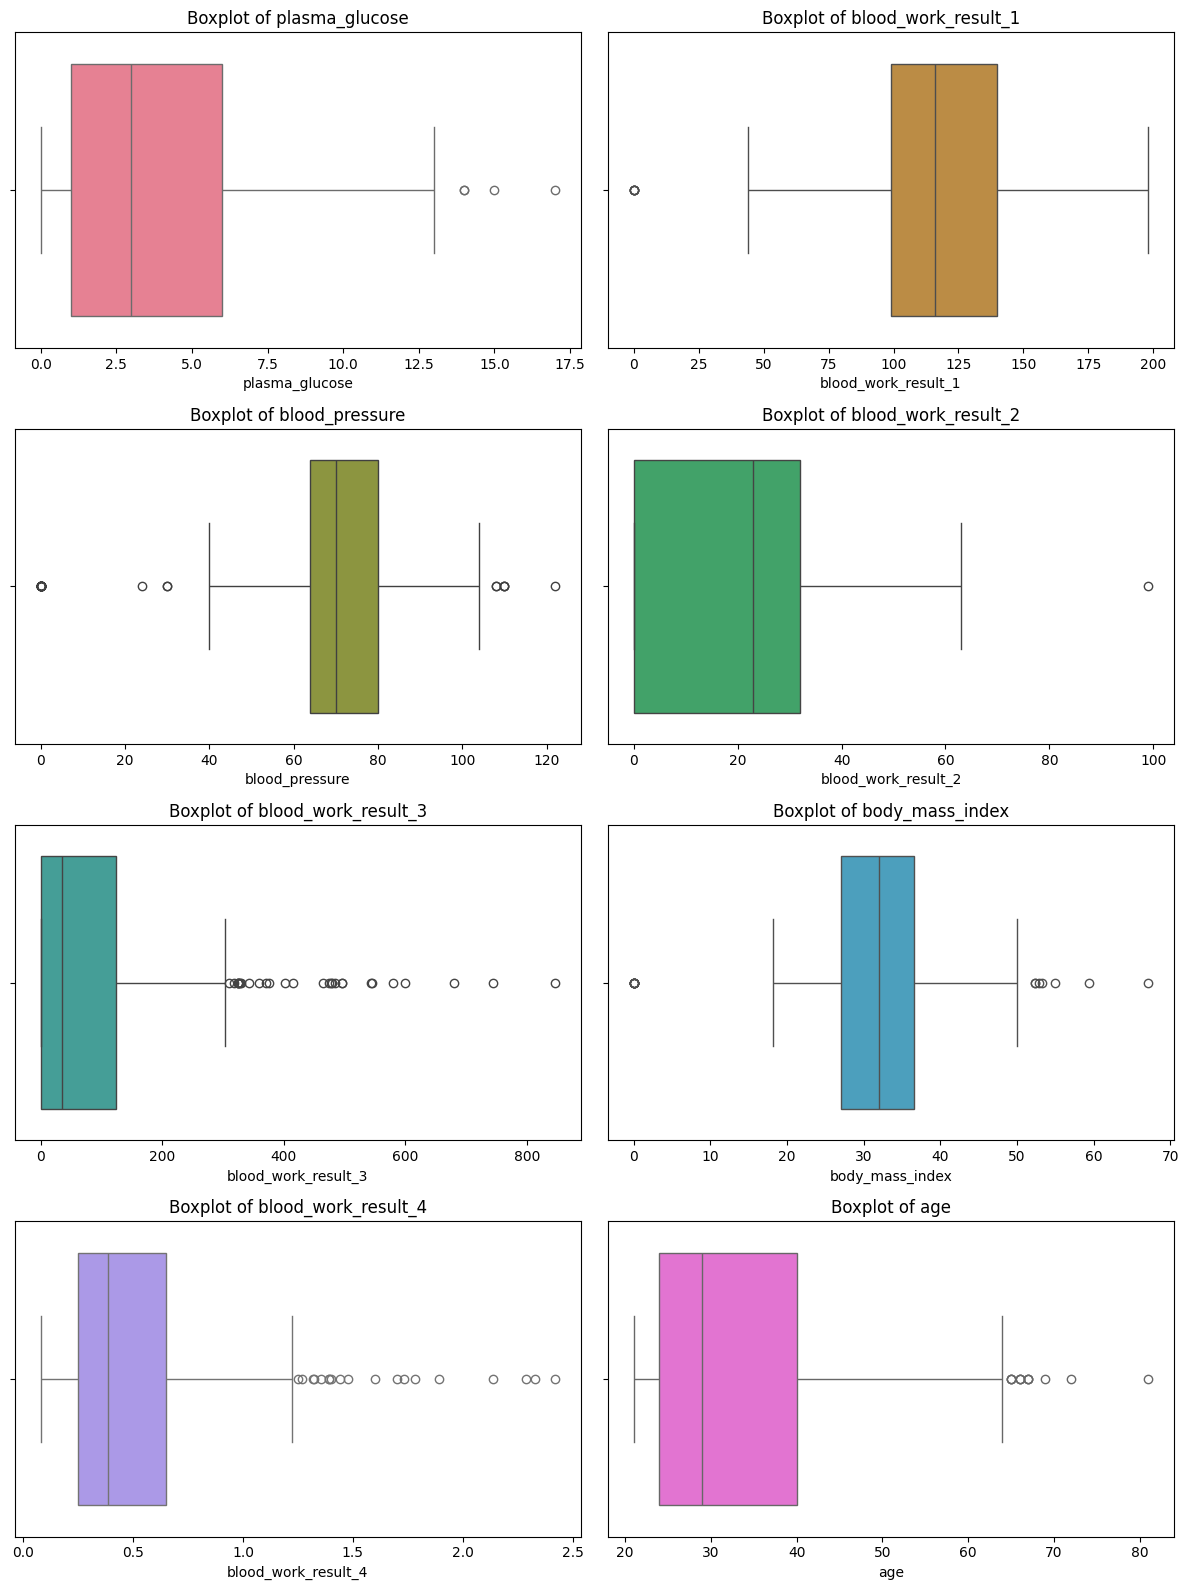

In [16]:
#Create box plots to visualize outliers
cols = ['plasma_glucose', 'blood_work_result_1', 'blood_pressure', 'blood_work_result_2', 'blood_work_result_3', 'body_mass_index', 'blood_work_result_4', 'age']

#Set up subplots
num_rows = len(cols) // 2 + len(cols) % 2
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(12, 4 * num_rows))

#Flatten the 2D array of subplots for easier indexing
axes = axes.flatten()

#Define a color palette with different colors
colors = sns.color_palette("husl", n_colors=len(cols))

#Iterate over columns and create boxplots for numeric columns with different colors
for i, (column, color) in enumerate(zip(cols, colors)):
    sns.boxplot(x=df[column], ax=axes[i], orient='h', color=color)  # Use df[column] instead of cols[column]
    axes[i].set_title(f'Boxplot of {column}')
    axes[i].set_xlabel(column)

#Remove empty subplots if the number of subplots is odd
if len(cols) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

#### Observations
##### Distribution results:
* Plasma Glucose, Blood Work Result-1, Blood Work Result-2, Blood Work Result-3, Blood Work Result-4 and Age are rightly-skewed.
* Blood Pressure and Body Mass Index are normally distributed.
##### Presence of outliers:
* Outliers are evident in several variables, particularly in the blood work results (1, 2, 3, and 4). These outliers warrant further investigation to determine if they are errors, genuine extreme values, or indicative of a specific subgroup within the dataset.  

#### BIVARIATE ANALYSIS

#### Sepsis vs Insurance
* Chi-square test of independence to determine if there's a significant association between having insurance and developing sepsis.

In [18]:
contingency_table = pd.crosstab(df['sepsis'], df['insurance'])
chi2, p_value, _, _ = chi2_contingency(contingency_table)
print(f"Chi-square statistic: {chi2:.3f}")
print(f"P-value: {p_value:.3f}")

Chi-square statistic: 2.071
P-value: 0.150


* The results suggest that having insurance or not doesn't seem to be a strong predictor of whether a person will develop sepsis

##### Scatter plot to visualize the relationships between pairs of numerical variables.

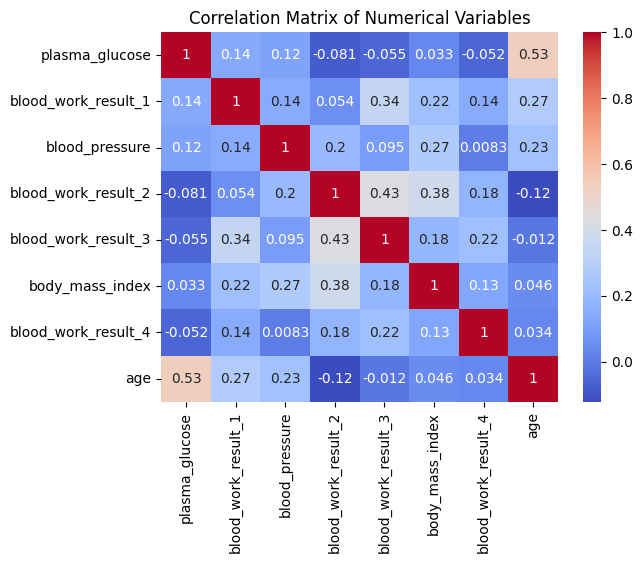

In [19]:
numeric_cols = ['plasma_glucose', 'blood_work_result_1', 'blood_pressure', 'blood_work_result_2', 'blood_work_result_3', 'body_mass_index', 'blood_work_result_4', 'age']
correlation_matrix = df[numeric_cols].corr()

# Visualize
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

##### Visualizing the relationship between Numerical Variables and Sepsis Status

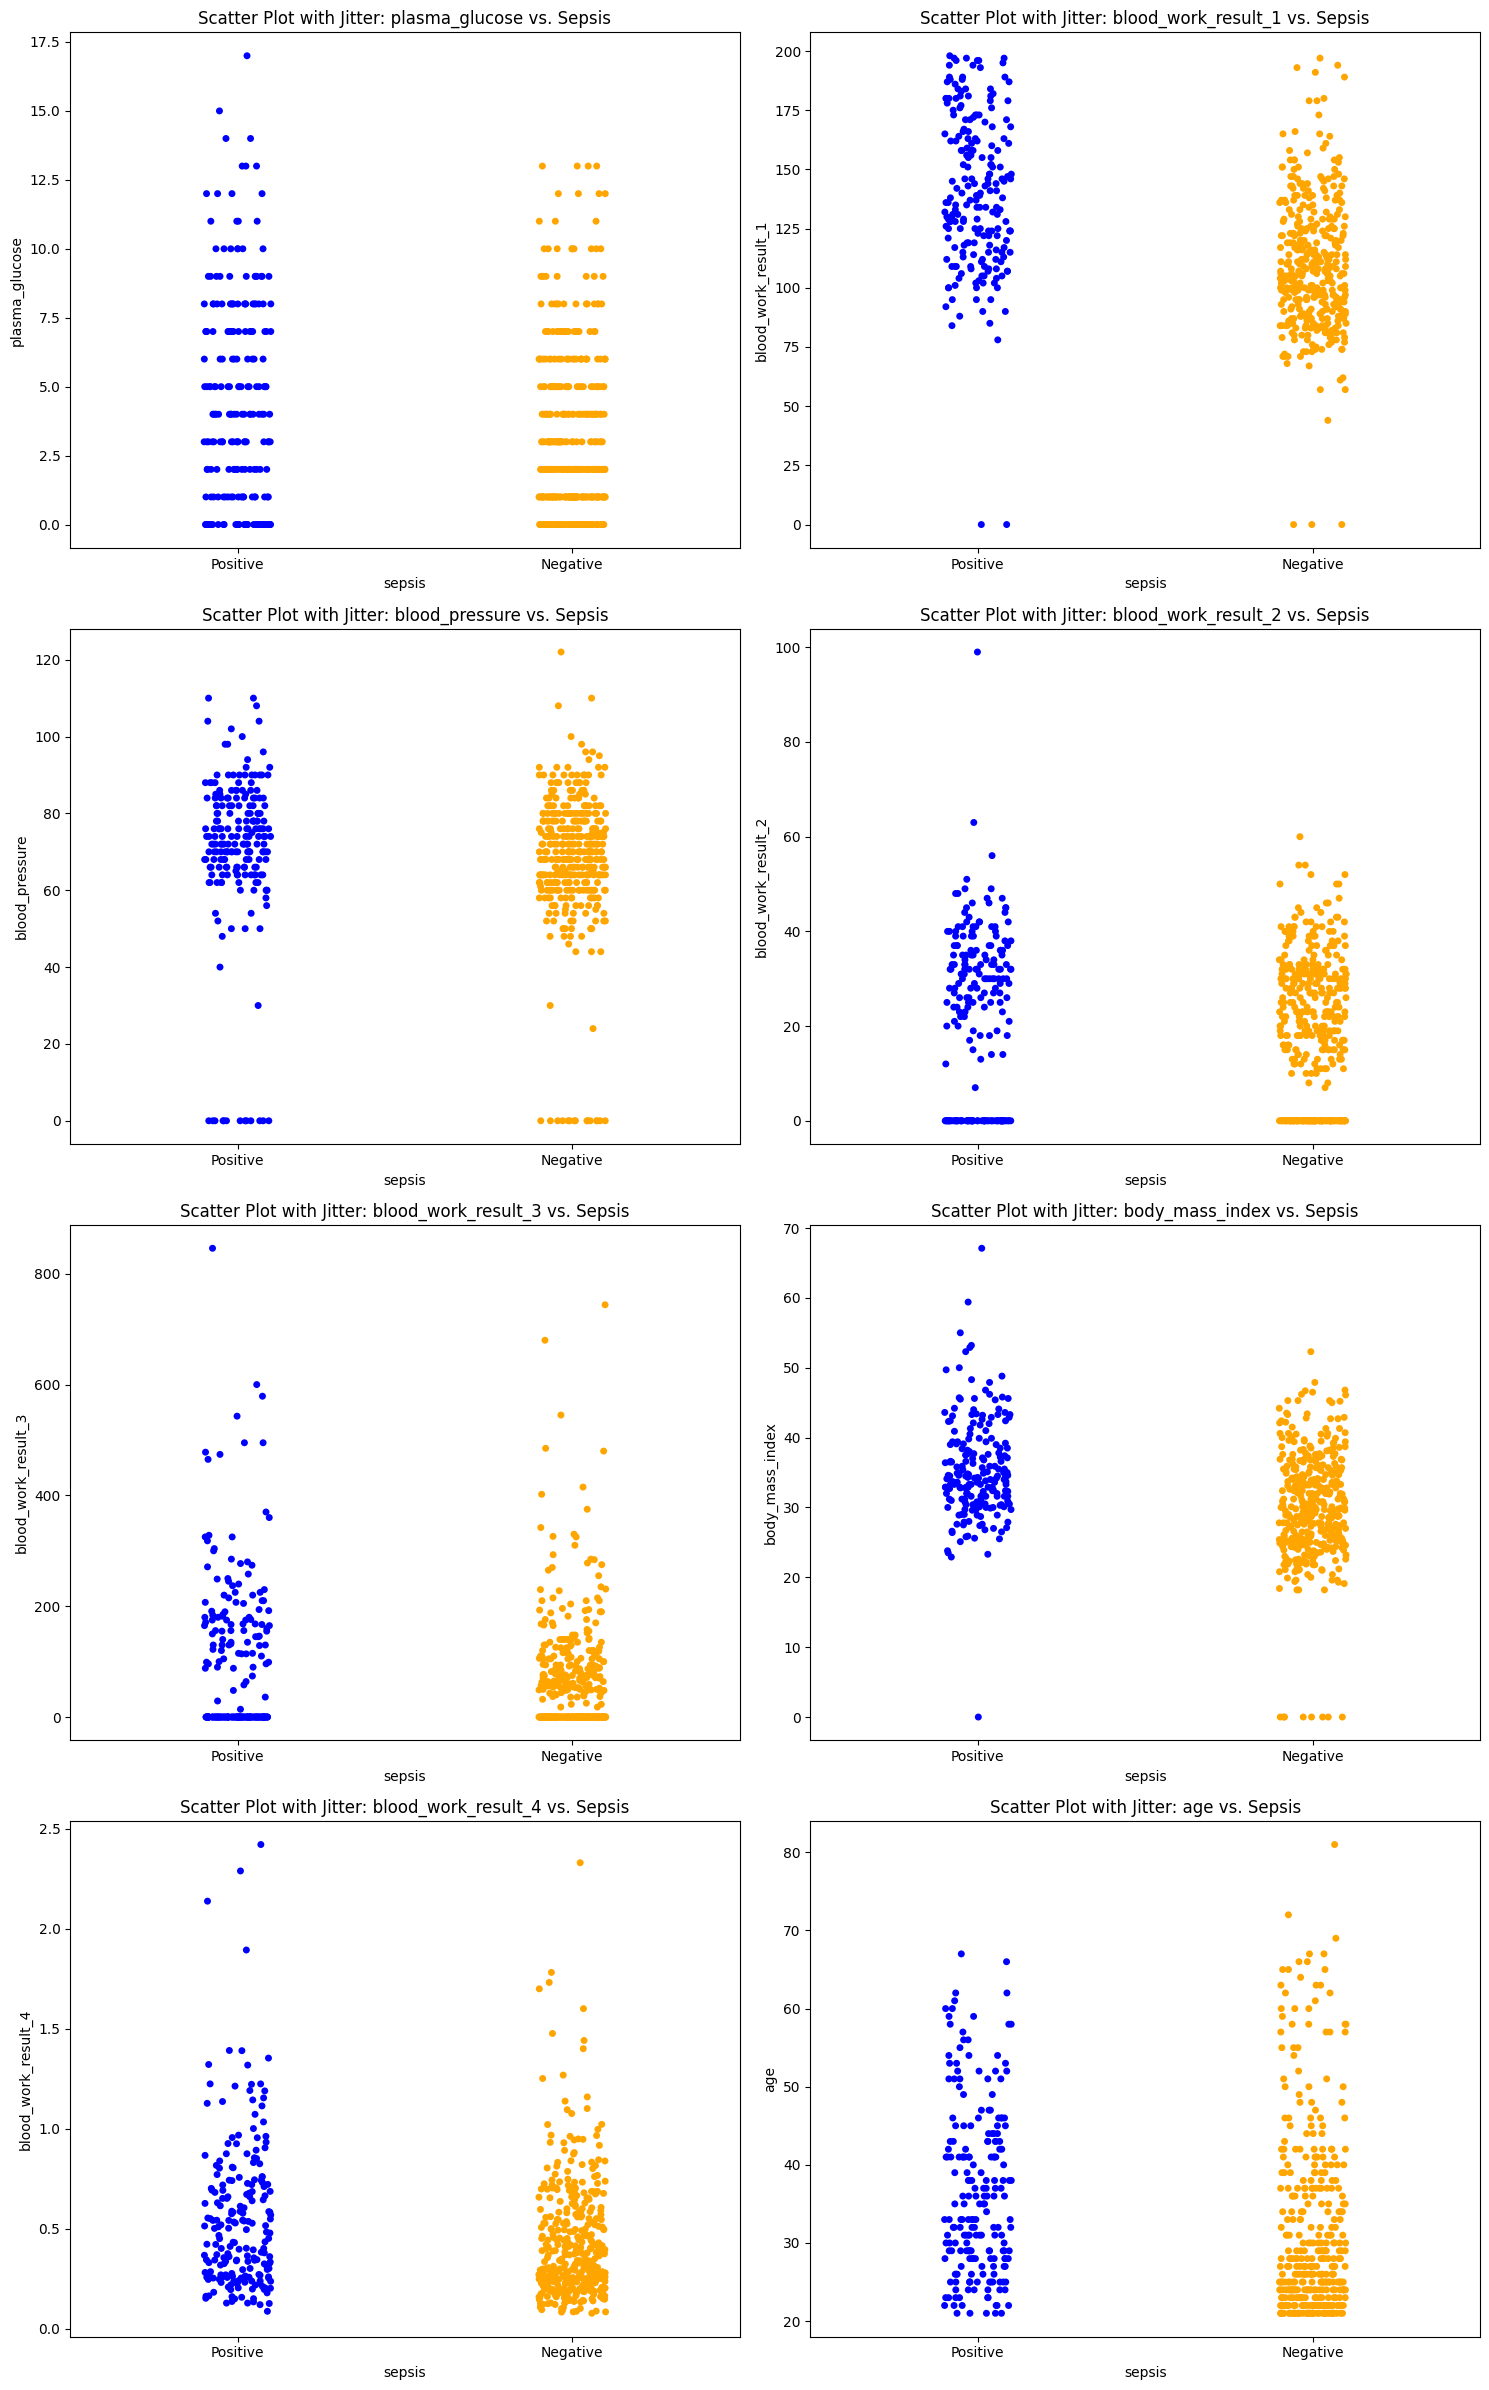

In [20]:
#List of numerical columns to plot
numeric_cols = ['plasma_glucose', 'blood_work_result_1', 'blood_pressure', 'blood_work_result_2', 'blood_work_result_3', 'body_mass_index', 'blood_work_result_4', 'age']

#Create subplots for each numerical variable
num_rows = len(numeric_cols) // 2 + len(numeric_cols) % 2  # Calculate rows for subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(15, 6 * num_rows))
axes = axes.flatten()

#Plot each numerical variable against Sepsis with jitter
for i, col in enumerate(numeric_cols):
    sns.stripplot(x='sepsis', y=col, data=df, jitter=True, ax=axes[i], hue='sepsis', palette=['blue', 'orange'])
    axes[i].set_title(f'Scatter Plot with Jitter: {col} vs. Sepsis')

#Remove empty subplots (if any)
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Observations
* Potential Predictors of Sepsis: Blood Work Result-2, Blood Work Result-3, and Blood Work Result-4 appear to be the most promising predictors of Sepsis.

* Limited Predictive Power: Plasma Glucose, Blood Pressure, Body Mass Index, and Age do not seem to be strong predictors of sepsis based on these plots alone, as there's substantial overlap between the groups.

#### MULTIVARIATE ANALYSIS

##### Perform PCA and Visualize the first few Principal Components to see how they relate to Sepsis.

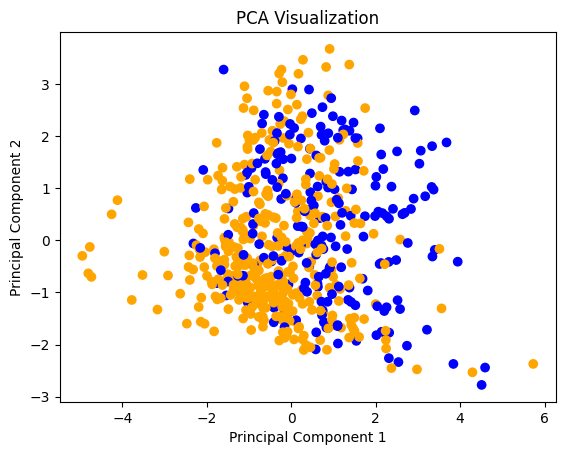

In [21]:
#Define predictor (X) and target (y) variables
X = df.drop(['id', 'sepsis'], axis=1)
y = df['sepsis']

#Standardize numerical variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Apply PCA
pca = PCA(n_components=2)  
X_pca = pca.fit_transform(X_scaled)

#Create a colormap for the 'Sepsis' categories
color_map = {'Positive': 'blue', 'Negative': 'orange'}
colors = [color_map[label] for label in y]

#Visualize
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()

#### ANSWERING THE ANALYTICAL QUESTIONS

1. How is the distribution of plasma glucose (PRG) among patients who develop Sepsis versus those who don't?

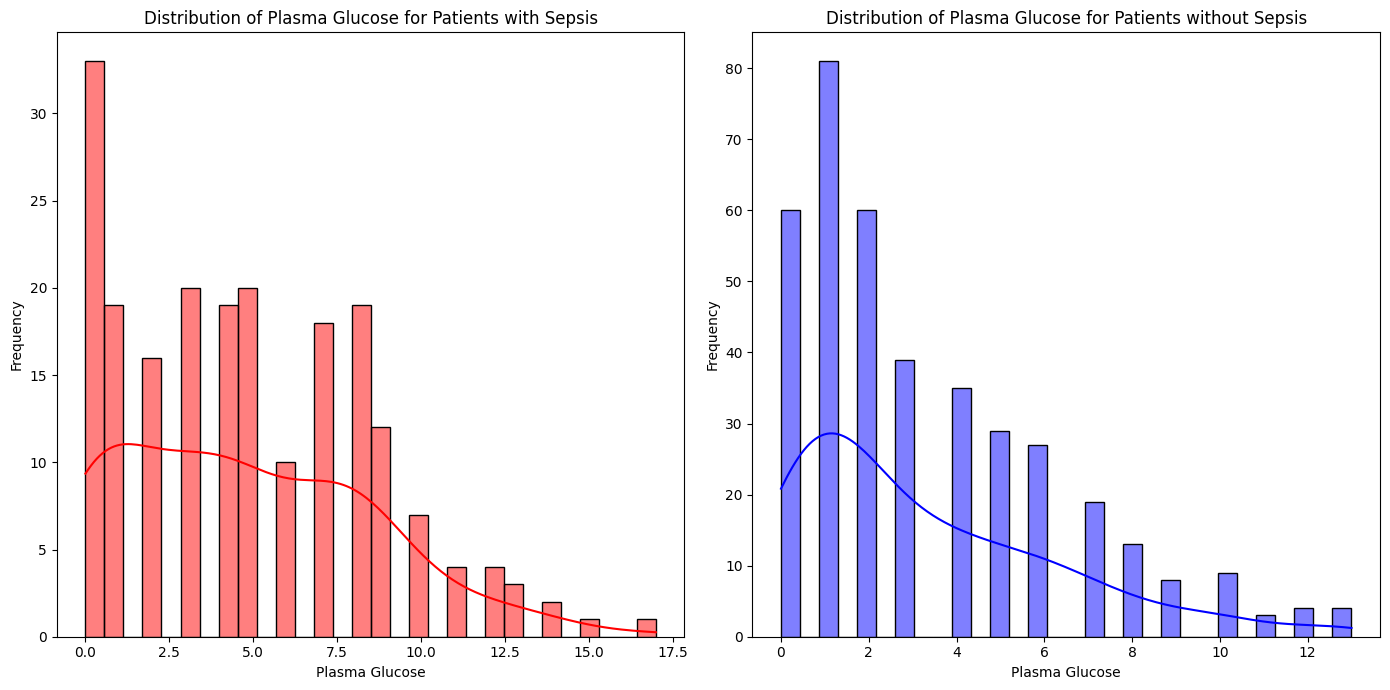

In [22]:
#Create histograms for PRG values
plt.figure(figsize=(14, 7))

#Histogram for patients who develop sepsis
plt.subplot(1, 2, 1)
sns.histplot(df[df['sepsis'] == 'Positive']['plasma_glucose'], kde=True, bins=30, color='red')
plt.title('Distribution of Plasma Glucose for Patients with Sepsis')
plt.xlabel('Plasma Glucose')
plt.ylabel('Frequency')

#Histogram for patients who do not develop sepsis
plt.subplot(1, 2, 2)
sns.histplot(df[df['sepsis'] == 'Negative']['plasma_glucose'], kde=True, bins=30, color='blue')
plt.title('Distribution of Plasma Glucose for Patients without Sepsis')
plt.xlabel('Plasma Glucose')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

* The histograms suggest that while low Plasma Glucose levels are common in both groups, higher Plasma Glucose levels are more prevalent in patients with Sepsis.

* This visual difference indicates that there might be a relationship between higher Plasma Glucose levels and the likelihood of sepsis, which aligns with the alternate hypothesis.

2. What is the correlation between blood pressure (PR) and the likelihood of sepsis development?

In [23]:
from scipy.stats import pointbiserialr

# Encode 'Sepssis' column: 0 for Negative, 1 for Positive
df['sepsis_binary'] = df['sepsis'].apply(lambda x: 1 if x == 'Positive' else 0)

# Calculate the point-biserial correlation
correlation, p_value = pointbiserialr(df['blood_pressure'], df['sepsis_binary'])
                                         

print('Point-biserial correlation coefficient:', correlation)
print('P-value:', p_value)

Point-biserial correlation coefficient: 0.06108646368071455
P-value: 0.13535052825595753


* The point-biserial correlation coefficient of 0.0611 indicates a very weak positive correlation between blood pressure (PR) and sepsis, but this correlation is not strong enough to be meaningful.

* The p-value of 0.135 indicates that the observed correlation is not statistically significant, meaning we cannot confidently say that there is a relationship between blood pressure and the likelihood of Sepsis.

3. Are there any noticeable differences in body mass index between patients with and without Sepsis?

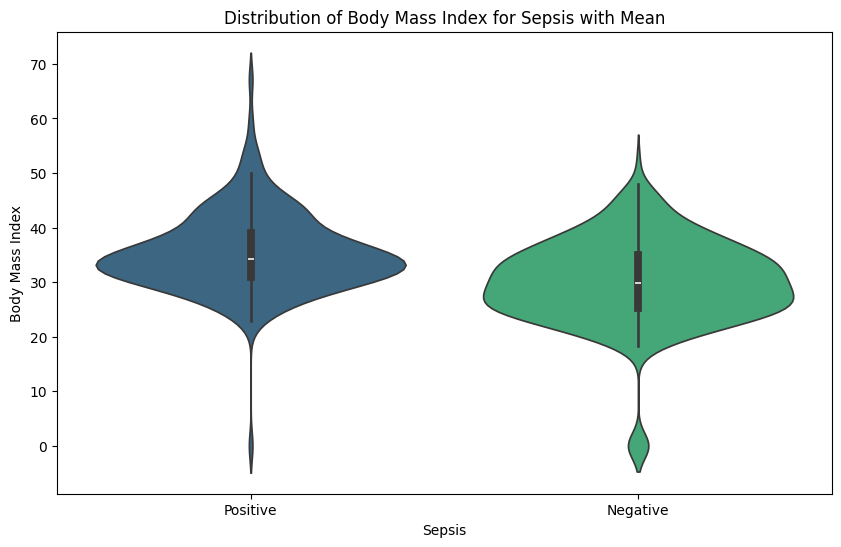

In [24]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sepsis', y='body_mass_index', data=df, palette='viridis', hue='sepsis', legend=False)

#Set labels and title
plt.xlabel('Sepsis')
plt.ylabel('Body Mass Index')
plt.title('Distribution of Body Mass Index for Sepsis with Mean')
plt.show()

* Both BMI of positive and negative sepsis cases are concentrated around the median.

* Positive cases of sepsis coincide with a higher BMI than negative cases.

4. How does age vary between patients who develop sepsis and those who don't?

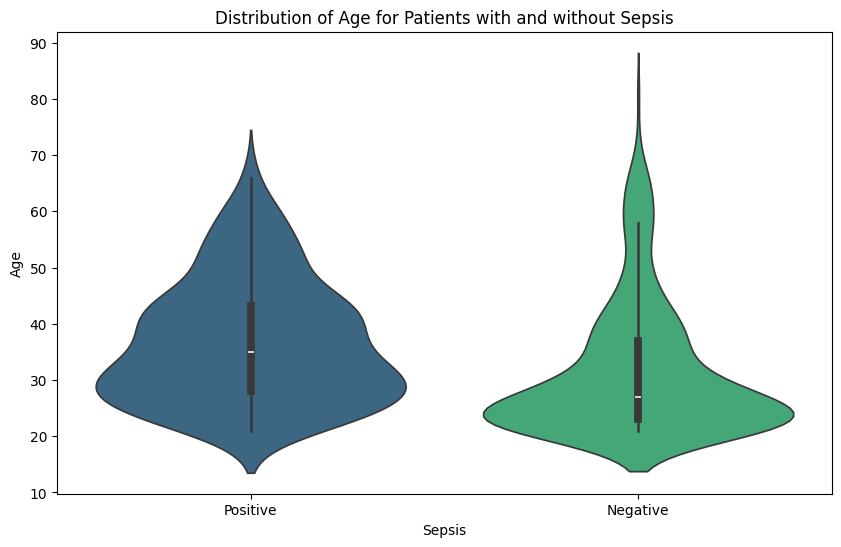

In [25]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='sepsis', y='age', hue='sepsis', data=df, palette='viridis', legend=False)

# Set labels and title
plt.xlabel('Sepsis')
plt.ylabel('Age')
plt.title('Distribution of Age for Patients with and without Sepsis')
plt.show()

* Patients with sepsis tend to be slightly older than those without sepsis.

* There is a wider range of ages among patients with sepsis, indicating that sepsis affects a broader age group.

* The peaks of the distributions show that the most common age for sepsis-positive patients is higher than for sepsis-negative patients.

5. Is there a pattern in the blood work results (PL, SK, TS, BD2) that distinguishes patients with sepsis from those without?

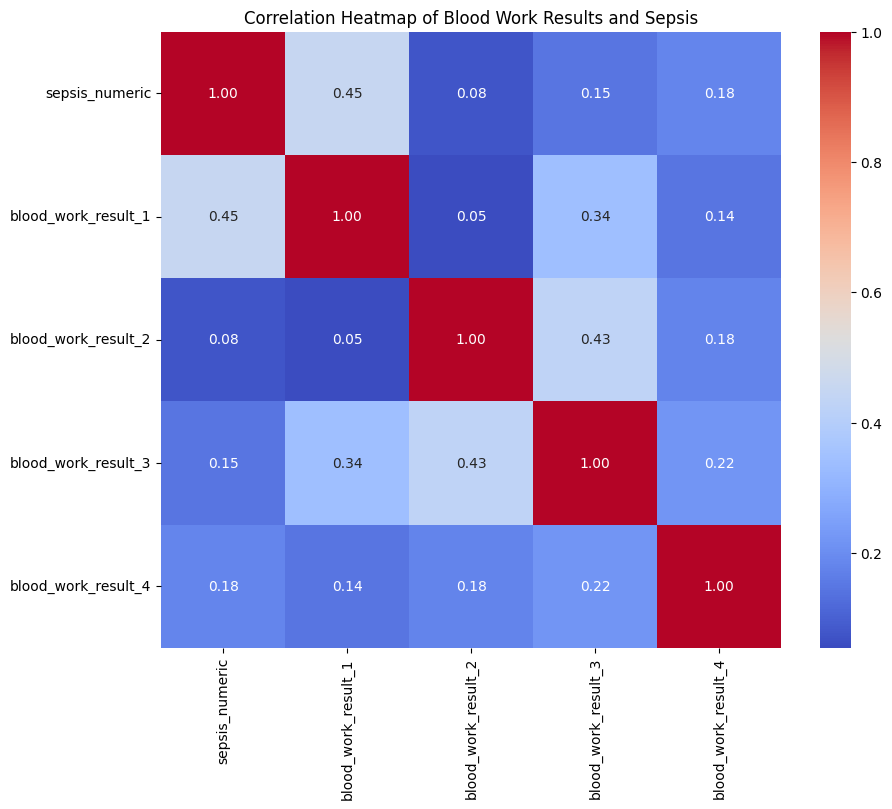

In [27]:
# Convert 'Sepsis' column to numeric
df['sepsis_numeric'] = df['sepsis'].apply(lambda x: 1 if x == 'Positive' else 0)

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation_matrix = df[['sepsis_numeric', 'blood_work_result_1', 'blood_work_result_2', 'blood_work_result_3', 'blood_work_result_4' ]].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Blood Work Results and Sepsis')
plt.show()

* Potential Predictors: "Blood Work Result-1" stands out as a potential predictor of sepsis due to its stronger correlation. This suggests that it might be useful for developing diagnostic or prognostic models.

* Combined Effect: It's possible that the blood work results, when considered together in a multivariate model, could have a stronger predictive power than any single test alone.

##### HYPOTHESIS TESTING
##### Null Hypothesis: There is no significant relationship between sepsis and PRG (Plasma/glucose).

##### Alternate Hypothesis: There is a significant relationship between sepsis and PRG (Plasma /glucose).

In [28]:
# Create a copy of the DataFrame
df_copy = df.copy()

# Replace 'Negative' and 'Positive' with 0 and 1, respectively
df_copy['sepsis'] = df_copy['sepsis'].replace({'Negative': 0, 'Positive': 1})

# Explicitly infer objects to avoid future downcasting issues
df_copy = df_copy.infer_objects(copy=False)

# Calculate point-biserial correlation coefficient
correlation_coefficient, p_value = stats.pointbiserialr(df_copy['sepsis'], df_copy['plasma_glucose'])

# Print the results
print(f"Point-Biserial Correlation Coefficient: {correlation_coefficient:.4f}")
print(f"P-value: {p_value:.4f}")

# Set the significance level (5%)
alpha = 0.05

# Determine if the correlation is statistically significant
if p_value < alpha:
    print("There is a significant correlation between sepsis and Plasma Glucose.")
else:
    print("There is no significant correlation between sepsis and Plasma Glucose.")

Point-Biserial Correlation Coefficient: 0.2071
P-value: 0.0000
There is a significant correlation between sepsis and Plasma Glucose.


#### DATA PREPARATION

In [29]:
#Preview dataset
df.head()

,id,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,age,insurance,sepsis,sepsis_binary,sepsis_numeric
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive,1,1
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative,0,0
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive,1,1
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative,0,0
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive,1,1


In [30]:
#Delete the ID, Sepsis_binary and Sepsis_numeric columns
df = df.drop(columns=['id', 'sepsis_binary', 'sepsis_numeric'],axis=1)
df.head()

,plasma_glucose,blood_work_result_1,blood_pressure,blood_work_result_2,blood_work_result_3,body_mass_index,blood_work_result_4,age,insurance,sepsis
0,6,148,72,35,0,33.6,0.627,50,0,Positive
1,1,85,66,29,0,26.6,0.351,31,0,Negative
2,8,183,64,0,0,23.3,0.672,32,1,Positive
3,1,89,66,23,94,28.1,0.167,21,1,Negative
4,0,137,40,35,168,43.1,2.288,33,1,Positive


##### Check if dataset is balanced

In [31]:
#Check dataset Imbalance in target variable(sepsis)
df['sepsis'].value_counts()

sepsis
Negative    391
Positive    208
Name: count, dtype: int64

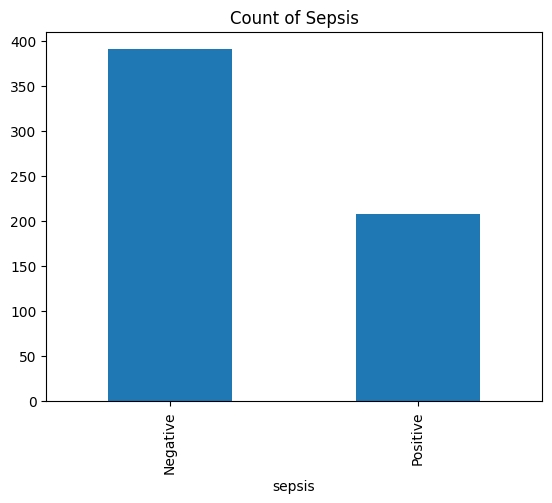

In [32]:
#Visualize this
df['sepsis'].value_counts().plot(kind='bar')
plt.title('Count of Sepsis')
plt.show()

* The number of patients who tested negative are almost twice as many as the ones that tested positve. Clearly the data is not balanced.

##### Split Dataset and Encode y_target

In [33]:
X = df.drop('sepsis', axis=1)

y = df['sepsis']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [35]:
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)

In [36]:
input_features = X.columns
input_features

Index(['plasma_glucose', 'blood_work_result_1', 'blood_pressure',
       'blood_work_result_2', 'blood_work_result_3', 'body_mass_index',
       'blood_work_result_4', 'age', 'insurance'],
      dtype='object')

##### Create the Preprocessor

In [37]:
preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='median'), input_features),
        ('scaler', RobustScaler(),input_features),
        ('log_transformations', FunctionTransformer(np.log1p), input_features)
    ]
)

##### MODELLING AND EVALUATION

In [39]:
#List of models to use
models = [
    ('logistic_regression', LogisticRegression(random_state=42)),
    ('random_forest', RandomForestClassifier(random_state=42)),
    ('svc', SVC(random_state=42, probability=True)),
    ('gradient_boost',  GradientBoostingClassifier(random_state=42))
]

##### Training On the Imbalanced Dataset

In [40]:
#Define the models
model = [
    ('logistic_regression', LogisticRegression(random_state=42)),  
    ('support_vector_classifier', SVC(random_state=42, probability=True)),  
    ('random_forest', RandomForestClassifier(random_state=42)),  
    ('gradient_boost', GradientBoostingClassifier(random_state=42))  
]

all_pipelines = {}

#Create a DataFrame for the metrics
metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('feature Importance', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier),
    ])
    
    #Fit data to pipeline
    pipeline.fit(X_train, y_train_encoded)
    all_pipelines[model_name] = pipeline

    #Make predictions on the test set
    y_pred = pipeline.predict(X_test)

    #Generate classification report for each model
    metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    accuracy = metrics['accuracy']
    precision = metrics['weighted avg']['precision']
    recall = metrics['weighted avg']['recall']
    f1_score= metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    metrics_output.loc[len(metrics_output)] = [model_name, accuracy, precision, recall, f1_score]

In [41]:
#Display the metrics_output
metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
0,logistic_regression,0.766667,0.763898,0.766667,0.764960
2,random_forest,0.740000,0.732528,0.740000,0.733392
3,gradient_boost,0.726667,0.717330,0.726667,0.717764
1,support_vector_classifier,0.686667,0.673982,0.686667,0.676461


* Best Performing Model: Logistic regression appears to be the best performing model for this imbalanced dataset, given its high accuracy, precision, recall, and F1 score.

* Random Forest and Gradient Boosting: These models also perform reasonably well, with random forest slightly outperforming gradient boosting.

* SVC: This model performs the worst and may require further tuning or alternative approaches to handle the imbalance better. 

##### Training On the Balanced Dataset

In [42]:
#Define the models
model = [
    ('logistic_regression', LogisticRegression(random_state=42)),  
    ('support_vector_classifier', SVC(random_state=42, probability=True)),  
    ('random_forest', RandomForestClassifier(random_state=42)), 
    ('gradient_boost', GradientBoostingClassifier(random_state=42)),  
]

all_balanced_pipelines = {}

# All confusion matrix
all_confusion_matrix =  {}

#Create a DataFrame for the metrics
balanced_metrics_output = pd.DataFrame(columns=['model_name', 'accuracy', 'precision', 'recall', 'f1_score'])

#Train and evaluate each model
for model_name, classifier in model:
    
    #Create pipeline
    balanced_pipeline = imbpipeline(steps=[
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42, k_neighbors=15, sampling_strategy='auto')),
        ('feature_selection', SelectKBest(mutual_info_classif, k='all')),
        ('classifier', classifier)
    ])
    
    #Fit data to pipeline
    balanced_pipeline.fit(X_train, y_train_encoded)
    all_balanced_pipelines[model_name] = balanced_pipeline

    #Make predictions on the test set
    y_pred = balanced_pipeline.predict(X_test)

    # Generate confusion matrix
    confusion_matrix_imb = confusion_matrix(y_test_encoded, y_pred)

    all_confusion_matrix[model_name] = confusion_matrix_imb

    #Generate classification report for each model
    balanced_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    #Evaluate the model
    balanced_accuracy = balanced_metrics['accuracy']
    balanced_precision = balanced_metrics['weighted avg']['precision']
    balanced_recall = balanced_metrics['weighted avg']['recall']
    balanced_f1_score= balanced_metrics['weighted avg']['f1-score']

    #Add metrics to metrics_output
    balanced_metrics_output.loc[len(balanced_metrics_output)] = [model_name, balanced_accuracy, balanced_precision, balanced_recall, balanced_f1_score]

In [44]:
#Display the metrics_output
balanced_metrics_output.sort_values(ascending=False, by='f1_score')

,model_name,accuracy,precision,recall,f1_score
0,logistic_regression,0.746667,0.770101,0.746667,0.751951
3,gradient_boost,0.733333,0.733333,0.733333,0.733333
2,random_forest,0.726667,0.727934,0.726667,0.727267
1,support_vector_classifier,0.706667,0.726783,0.706667,0.712274


* Logistic Regression is the best-performing model on this balanced dataset, with the highest accuracy, precision, recall, and F1 score.

* Gradient Boosting and Random Forest also perform well, with Gradient Boosting being slightly better.

* Support Vector Classifier performs the least effectively among the four models.

In [45]:
all_balanced_pipelines['gradient_boost']

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('imputer',
                                                  SimpleImputer(strategy='median'),
                                                  Index(['plasma_glucose', 'blood_work_result_1', 'blood_pressure',
       'blood_work_result_2', 'blood_work_result_3', 'body_mass_index',
       'blood_work_result_4', 'age', 'insurance'],
      dtype='object')),
                                                 ('scaler', RobustScaler(),
                                                  Index(['plasma_glucose', 'blood_wor...
                                                  Index(['plasma_glucose', 'blood_work_result_1', 'blood_pressure',
       'blood_work_result_2', 'blood_work_result_3', 'body_mass_index',
       'blood_work_result_4', 'age', 'insurance'],
      dtype='object'))])),
                ('smote', SMOTE(k_neighbors=15, random_state=42)),
                ('feature_selection',
                 SelectKBest(k='all',
                             score_func=<function mutual_info_classif at 0x00000190B89499E0>)),
                ('classifier', GradientBoostingClassifier(random_state=42))])

##### HYPERPARAMETER TUNING

In [46]:
#Hyperparameter tuning the imbalanced pipeline
# Define parameter grids for each model
param_grids = {
    'support_vector_classifier': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'gradient_boost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Initialize a DataFrame to store the results
tuned_models_df = pd.DataFrame(columns=['Model name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Perform Grid Search for each model
for model_name, pipeline in all_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train_encoded)
    
    # Update pipeline with best parameters
    best_pipeline = grid_search.best_estimator_
    all_pipelines[model_name] = best_pipeline
    
    # Make predictions with the tuned model
    y_pred = best_pipeline.predict(X_test)
    
    # Store classification report values as a dictionary
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Grab values from the balanced metric dictionary
    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']
    
    # Add these values to the table
    tuned_models_df.loc[len(tuned_models_df)] = [model_name, accuracy, precision, recall, f1]

# Sort table to have highest f1 on top
tuned_models_df.sort_values(by='F1-Score', ascending=False, inplace=True)

# Display the results
print(tuned_models_df)

                  Model name  Accuracy  Precision    Recall  F1-Score
0        logistic_regression  0.766667   0.763898  0.766667  0.764960
1  support_vector_classifier  0.746667   0.739259  0.746667  0.739340
2              random_forest  0.740000   0.736811  0.740000  0.738098
3             gradient_boost  0.733333   0.723904  0.733333  0.721481


* Logistic Regression is the best-performing model with the highest accuracy, precision, recall, and F1-score, indicating its effectiveness for this dataset.

* Support Vector Classifier and Random Forest models show similar performance, with Random Forest slightly outperforming in terms of recall.

* Gradient Boosting performs the least effectively but still offers reasonable predictions.

In [47]:
#Hyperparameter tuning the balanced pipeline
# Define parameter grids for each model
param_grids = {
    'support_vector_classifier': {
        'classifier__C': [0.1, 1, 10],
        'classifier__kernel': ['linear', 'rbf']
    },
    'logistic_regression': {
        'classifier__C': [0.1, 1, 10],
        'classifier__penalty': ['l2'],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
    'random_forest': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__max_depth': [None, 10, 20]
    },
    'gradient_boost': {
        'classifier__n_estimators': [50, 100, 200],
        'classifier__learning_rate': [0.01, 0.1, 0.2]
    }
}

# Initialize a DataFrame to store the results
tuned_models_df = pd.DataFrame(columns=['Model name', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Perform Grid Search for each model
for model_name, pipeline in all_balanced_pipelines.items():
    param_grid = param_grids[model_name]
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1_weighted')
    grid_search.fit(X_train, y_train_encoded)
    
    # Update pipeline with best parameters
    best_pipeline = grid_search.best_estimator_
    all_balanced_pipelines[model_name] = best_pipeline
    
    # Make predictions with the tuned model
    y_pred = best_pipeline.predict(X_test)
    
    # Store classification report values as a dictionary
    tuned_metrics = classification_report(y_test_encoded, y_pred, output_dict=True)
    
    # Grab values from the balanced metric dictionary
    accuracy = tuned_metrics['accuracy']
    precision = tuned_metrics['weighted avg']['precision']
    recall = tuned_metrics['weighted avg']['recall']
    f1 = tuned_metrics['weighted avg']['f1-score']
    
    # Add these values to the table
    tuned_models_df.loc[len(tuned_models_df)] = [model_name, accuracy, precision, recall, f1]

# Sort table to have highest f1 on top
tuned_models_df.sort_values(by='F1-Score', ascending=False, inplace=True)

In [48]:
#Display the results
print(tuned_models_df)

                  Model name  Accuracy  Precision    Recall  F1-Score
0        logistic_regression  0.753333   0.774431  0.753333  0.758276
2              random_forest  0.746667   0.749105  0.746667  0.747751
1  support_vector_classifier  0.740000   0.757300  0.740000  0.744705
3             gradient_boost  0.720000   0.728726  0.720000  0.723215


* Logistic Regression emerges as the best-performing model after hyperparameter tuning, with the highest precision and F1-score, suggesting it strikes the best balance between precision and recall.

* Random Forest is a close second, with metrics very close to those of Logistic Regression.

* Support Vector Classifier performs well but has a slightly lower recall, affecting its F1-score.

* Gradient Boosting has the lowest performance metrics, making it the least effective model in this scenario.

##### Save the Best Models

In [49]:
#Persist the trained pipelines along with label encoder
for model_name, pipeline in all_pipelines.items():
    # Save the pipeline object
    joblib.dump(pipeline, f'./Models/{model_name}_pipeline.pkl')

#Save label encoder separately
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']